In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [19]:
boston_df = pd.read_csv('./datasets/Boston.csv', index_col=0)
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [20]:
y_target = boston_df['medv']
x_data = boston_df.drop('medv', axis=1)

In [21]:
x_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x_data,y_target,test_size=0.3, random_state=156)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse, r2_score(y_test, y_preds))

17.296915907902054 4.158956107955704 0.7572263323138935


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_data)
boston_scaled = scaler.transform(x_data)

In [25]:
boston_df_scaled = pd.DataFrame(data=boston_scaled, columns=x_data.columns)

print(boston_df_scaled.mean())
print(boston_df_scaled.var())

crim      -1.123388e-16
zn         7.898820e-17
indus      2.106352e-16
chas      -3.510587e-17
nox       -1.965929e-16
rm        -1.088282e-16
age       -1.474446e-16
dis       -8.425408e-17
rad       -1.123388e-16
tax        0.000000e+00
ptratio   -4.212704e-16
black     -7.442444e-16
lstat     -3.089316e-16
dtype: float64
crim       1.00198
zn         1.00198
indus      1.00198
chas       1.00198
nox        1.00198
rm         1.00198
age        1.00198
dis        1.00198
rad        1.00198
tax        1.00198
ptratio    1.00198
black      1.00198
lstat      1.00198
dtype: float64


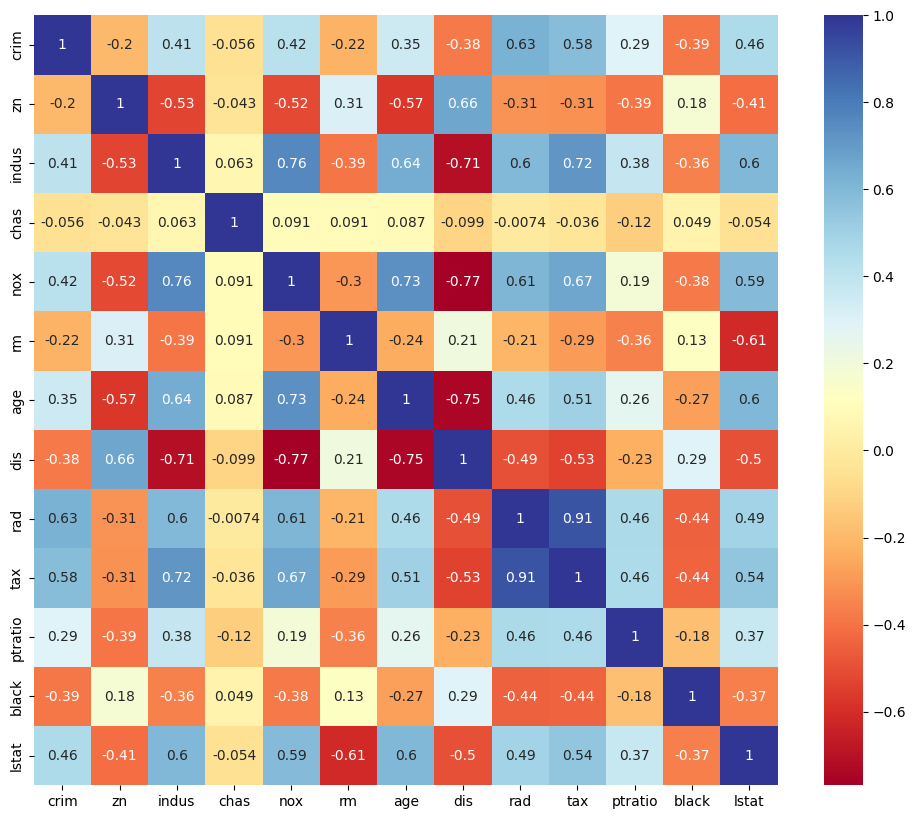

In [26]:
boston_df_scaled.corr()
plt.figure(figsize=(12, 10))
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(boston_df_scaled.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

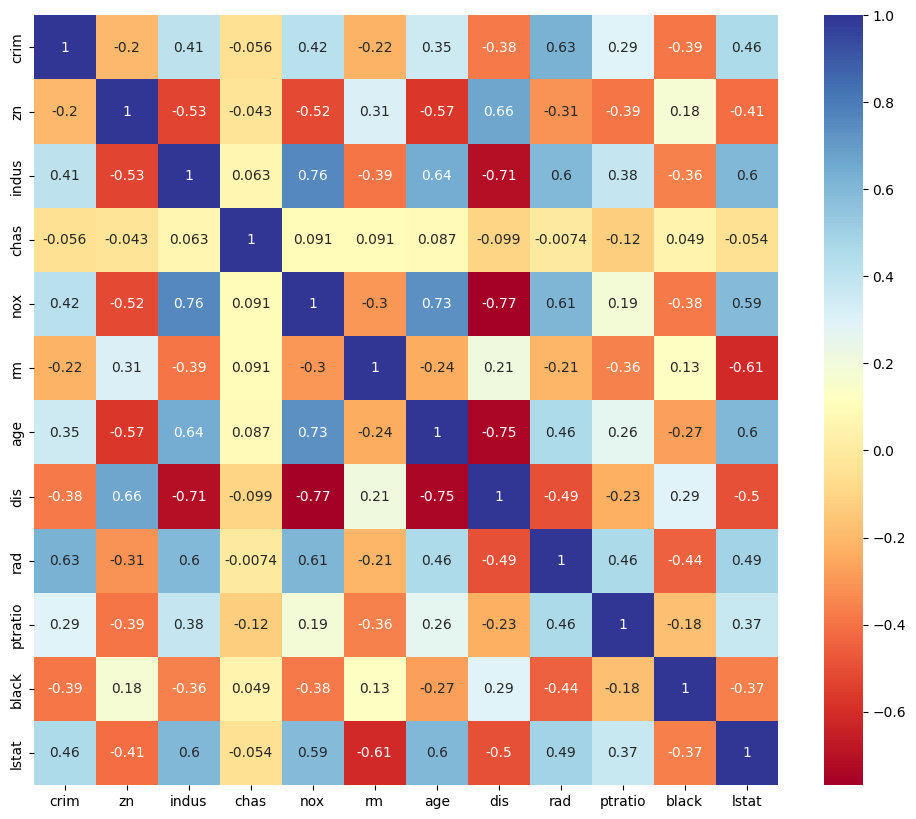

In [27]:
boston_df_dr1 = boston_df_scaled.drop("tax", axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(boston_df_dr1,y_target,test_size=0.3, random_state=156)
boston_df_dr1.corr()
plt.figure(figsize=(12, 10))
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(boston_df_dr1.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse, r2_score(y_test, y_preds))

17.46622930337561 4.179261813212426 0.7548499066998495


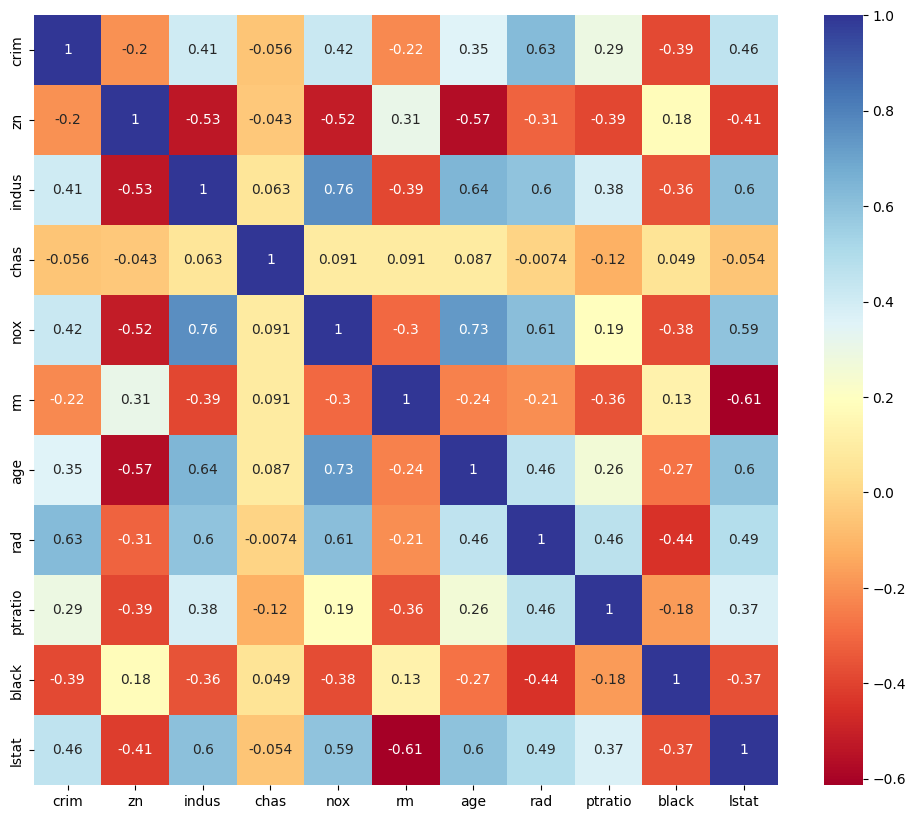

In [30]:
boston_df_dr2 = boston_df_dr1.drop("dis", axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(boston_df_dr2,y_target,test_size=0.3, random_state=156)
boston_df_dr2.corr()
plt.figure(figsize=(12, 10))
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(boston_df_dr2.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

In [31]:
model=LinearRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse, r2_score(y_test, y_preds))

17.686503363837584 4.205532470905151 0.7517582144097786


## sklearn.tree.DecisionTreeRegressor
* class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

## sklearn.ensemble.RandomForestRegressor
* class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]¶

In [32]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse, r2_score(y_test, y_preds))

8.526066697368414 2.9199429270738175 0.8803310084827973


In [33]:
import xgboost as xgb
from xgboost import XGBRegressor
model=XGBRegressor(random_state=0)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse, r2_score(y_test, y_preds))

7.509278421126022 2.7403062641110068 0.894602305192451


In [34]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(random_state=0)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse, r2_score(y_test, y_preds))

17.469917776533478 4.179703072771256 0.7547981365368063


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(random_state=0)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse, r2_score(y_test, y_preds))

7.933768153215783 2.8166945438254007 0.888644310732442


(100, 2)


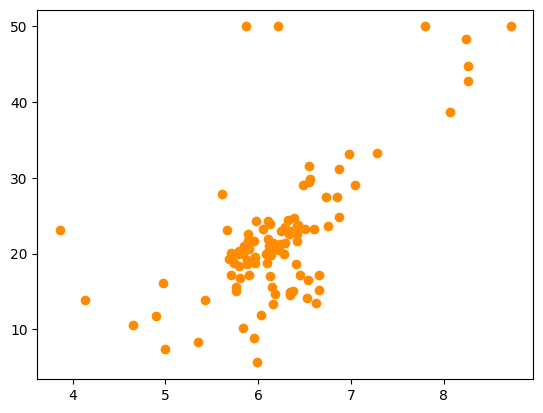

In [38]:
boston_df_sample = boston_df[['rm', 'medv']]
boston_df_sample = boston_df_sample.sample(n=100, random_state=0)
print(boston_df_sample.shape)
plt.figure()
plt.scatter(boston_df_sample.rm, boston_df_sample.medv, c='darkorange')

In [39]:
from sklearn.tree import DecisionTreeRegressor
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)
X_test = np.arange(4.5 , 8.5, 0.04).reshape(-1,1)

X_feature = boston_df_sample['rm'].values.reshape(-1,1)
y_target = boston_df_sample['medv'].values.reshape(-1,1)

rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

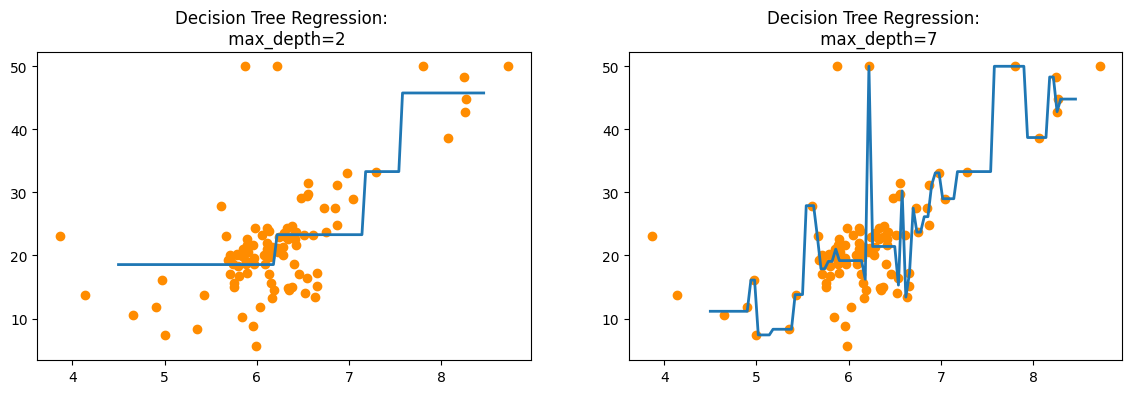

In [40]:
fig, (ax2, ax3) = plt.subplots(figsize=(14,4), ncols=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(boston_df_sample.rm, boston_df_sample.medv, c="darkorange")
ax2.plot(X_test, pred_rf2, label ="max_depth:2", linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(boston_df_sample.rm, boston_df_sample.medv, c="darkorange")
ax3.plot(X_test, pred_rf7, label ="max_depth:7", linewidth=2)